In [1]:
from BPMQ_model import TISRAW2BPMQ_model, train_TISRAW2BPMQ_model, sort_by_Dnum
from TIS161_coeffs import TIS161_coeffs

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import torch
import os
_dtype = torch.float32

import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="To copy construct from a tensor")

In [3]:
data_path = 'C:/Users/HWANG/Workspace/BPM4pickup/ML/BPMQ_training_data/'
epochs = 500
lr = 2e-3

In [4]:
BPMs = [ 'LS3_BTS:BPM_D4753',
         'LS3_BTS:BPM_D4769',
         'LS3_BTS:BPM_D4843',
         'LS3_BTS:BPM_D4886',
         'LS3_BTS:BPM_D4968',
         'LS3_BTS:BPM_D5010',
         'LS3_BTS:BPM_D5092',
         'LS3_BTS:BPM_D5134',
         'LS3_BTS:BPM_D5216',
         'LS3_BTS:BPM_D5259',
         'LS3_BTS:BPM_D5340',
         'LS3_BTS:BPM_D5381',
         'LS3_BTS:BPM_D5430',
         'LS3_BTS:BPM_D5445',
         'BDS_BTS:BPM_D5499',
         'BDS_BTS:BPM_D5513',
         'BDS_BTS:BPM_D5565']

# ISAAC data

# low data fidelity

In [5]:
training_data = pickle.load(open(data_path+'[fidel0]BDS_beamQ_training_data_from_ISAAC_PMver0.pkl','rb'))
for k,v in training_data.items():
    print(f'{k}:   \t type={type(v).__name__}, \t lenth={len(v)}')

rel_path:   	 type=list, 	 lenth=73
n_data:   	 type=list, 	 lenth=73
measurement:   	 type=list, 	 lenth=73
simulation:   	 type=list, 	 lenth=73
fit_result:   	 type=list, 	 lenth=73
image:   	 type=list, 	 lenth=73
fit_info:   	 type=list, 	 lenth=73
reconstruted_CS_at_entrance_of:   	 type=list, 	 lenth=73


### fit_loss_stat

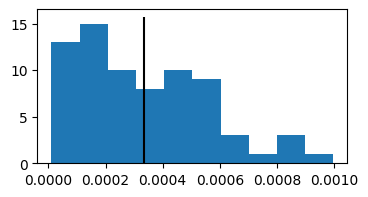

In [6]:
fit_loss = training_data['fit_result']
fig_loss_mean = np.mean(fit_loss)
fig,ax = plt.subplots(figsize=(4,2))
ax.hist(training_data['fit_result'])
ax.vlines(fig_loss_mean,*ax.get_ylim(),'k')

### CS_stat


In [7]:
training_data['reconstruted_CS_at_entrance_of'][0]

ytwiss_alpha  xnemittance  xtwiss_beta  ytwiss_beta  \
LS3_WD06:BPM_D4699     -0.312407     0.156055     3.916924     6.025271   
LS3_BTS:DCH_D4709      -0.494481     0.156055     4.064247     6.831755   
LS3_BTS:DCV_D4709      -0.494481     0.156055     4.064247     6.831755   
LS3_BTS:QV_D4713       -0.548129     0.156055     4.205234     7.138804   
LS3_BTS:QH_D4718        2.043357     0.156055     6.008485     5.645476   
...                          ...          ...          ...          ...   
BDS_BTS:QH_D5559       11.559303     0.156055     3.309462    13.293220   
BDS_BTS:DCH_D5563       1.064388     0.156055     3.650867     9.729807   
BDS_BTS:DCV_D5563       1.064388     0.156055     3.650867     9.729807   
BDS_BTS:BPM_D5565       1.013076     0.156055     3.471620     9.243531   
BDS_BTS:PM_D5567        0.981228     0.156055     3.378132     8.953795   

                    ynemittance  xtwiss_alpha  
LS3_WD06:BPM_D4699     0.140787      0.054264  
LS3_BTS:DCH_D4709      0.140787     -0.201662  
LS3_BTS:DCV_D4709      0.140787     -0.201662  
LS3_BTS:QV_D4713       0.140787     -0.277070  
LS3_BTS:QH_D4718       0.140787     -2.579266  
...                         ...           ...  
BDS_BTS:QH_D5559       0.140787     -2.412883  
BDS_BTS:DCH_D5563      0.140787      0.420619  
BDS_BTS:DCV_D5563      0.140787      0.420619  
BDS_BTS:BPM_D5565      0.140787      0.345161  
BDS_BTS:PM_D5567       0.140787      0.298327  

[96 rows x 6 columns]

In [8]:
elems = training_data['reconstruted_CS_at_entrance_of'][0].index
cols  = training_data['reconstruted_CS_at_entrance_of'][0].columns
CSs = {}
for elem in elems:
    CSs[elem] = []
    for cs_df in training_data['reconstruted_CS_at_entrance_of']:
        CSs[elem].append(cs_df.loc[elem])
    CSs[elem] = pd.concat(CSs[elem],axis=1,ignore_index=True)

ytwiss_alpha     0.129842
xnemittance      0.214775
xtwiss_beta     10.389627
ytwiss_beta     10.575679
ynemittance      0.215534
xtwiss_alpha    -0.359215
dtype: float64
ytwiss_alpha    1.548591
xnemittance     0.132831
xtwiss_beta     8.646275
ytwiss_beta     8.995094
ynemittance     0.131631
xtwiss_alpha    1.335866
dtype: float64


0          1          2          3          4         5   \
ytwiss_alpha -0.312407   0.710889   0.024070   0.201325  -1.792391 -1.853328   
xnemittance   0.156055   0.143603   0.255530   0.153684   0.441612  0.385388   
xtwiss_beta   3.916924  15.560994   6.422940  10.117667  10.237224  8.814776   
ytwiss_beta   6.025271   3.192784  10.559836   4.174984   6.097161  6.153712   
ynemittance   0.140787   0.141790   0.309482   0.208936   0.469354  0.423053   
xtwiss_alpha  0.054264  -0.646986   0.490246  -0.074963  -0.017732  0.078549   

                    6          7          8         9   ...         63  \
ytwiss_alpha -0.531275   4.251219   3.745278  0.228369  ...   2.311747   
xnemittance   0.454285   0.083866   0.100017  0.094581  ...   0.216094   
xtwiss_beta   5.112927  12.375650  18.292052  5.276663  ...  25.936453   
ytwiss_beta   1.609109  38.105278  23.439821  7.359844  ...  32.878229   
ynemittance   0.309117   0.196265   0.113627  0.094692  ...   0.188348   
xtwiss_alpha  0.138112   0.767449   0.988470  0.368650  ...  -7.997615   

                     64         65         66        67         68         69  \
ytwiss_alpha   0.825390   1.149924   4.124186 -0.571318  -0.107953  -1.239753   
xnemittance    0.208046   0.481891   0.077098  0.642314   0.127019   0.224774   
xtwiss_beta   10.044842   3.505692  60.709291  4.568829  22.460726  16.721442   
ytwiss_beta   14.565877  10.366609  31.320232  2.574982  27.465361  18.152783   
ynemittance    0.186228   0.373546   0.127923  0.614573   0.235674   0.258559   
xtwiss_alpha  -0.627263  -0.816741  -2.876464 -0.520330  -2.861395  -1.468599   

                    70        71        72  
ytwiss_alpha  0.449982  0.317969  0.376984  
xnemittance   0.110471  0.376603  0.561046  
xtwiss_beta   3.440670  4.340206  3.630895  
ytwiss_beta   4.483084  3.153872  5.645612  
ynemittance   0.121585  0.464970  0.672727  
xtwiss_alpha  0.557433  0.133327  0.319029  

[6 rows x 73 columns]

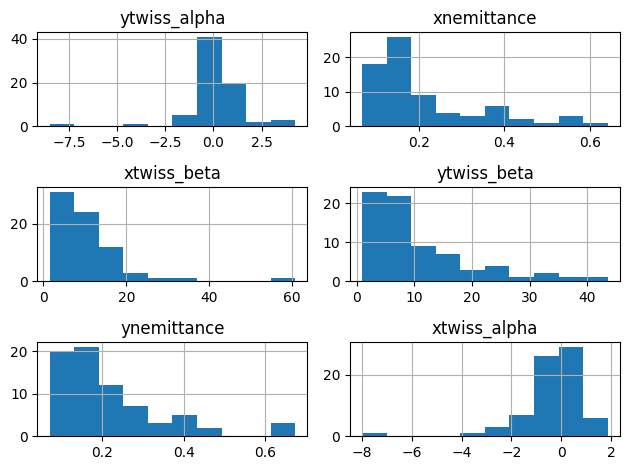

In [9]:
elem = "LS3_WD06:BPM_D4699"
CSs[elem].T.hist()
plt.tight_layout()
print(CSs[elem].T.mean())
print(CSs[elem].T.std())
CSs[elem]

ytwiss_alpha    -1.649402
xnemittance      0.214775
xtwiss_beta      9.212877
ytwiss_beta     12.312737
ynemittance      0.215534
xtwiss_alpha    -1.374941
dtype: float64
ytwiss_alpha     1.865172
xnemittance      0.132831
xtwiss_beta      7.354622
ytwiss_beta     10.641368
ynemittance      0.131631
xtwiss_alpha     1.772936
dtype: float64


0         1          2          3         4         5   \
ytwiss_alpha  0.054568 -0.109826  -2.087087  -5.809228 -0.631015 -0.607962   
xnemittance   0.156055  0.143603   0.255530   0.153684  0.441612  0.385388   
xtwiss_beta   9.899155  8.457335   6.076471   8.845574  7.687578  9.167391   
ytwiss_beta   8.745947  4.656860  14.565836  27.165338  5.723430  5.478340   
ynemittance   0.140787  0.141790   0.309482   0.208936  0.469354  0.423053   
xtwiss_alpha -1.249877  0.295315  -1.212175   0.305484 -1.082637 -1.336050   

                     6          7         8          9   ...         63  \
ytwiss_alpha  -0.634929  -1.461139  0.734929  -0.291454  ...  -4.408397   
xnemittance    0.454285   0.083866  0.100017   0.094581  ...   0.216094   
xtwiss_beta   14.469301   3.090552  3.582498  11.945198  ...  18.415331   
ytwiss_beta    4.169958  29.153734  7.245504   3.397057  ...  24.098293   
ynemittance    0.309117   0.196265  0.113627   0.094692  ...   0.188348   
xtwiss_alpha  -1.682147  -0.933329 -1.472117  -2.581896  ...   1.408567   

                     64        65        66         67         68         69  \
ytwiss_alpha  -1.776648 -0.589806  0.792415   0.001771  -4.761150  -4.750545   
xnemittance    0.208046  0.481891  0.077098   0.642314   0.127019   0.224774   
xtwiss_beta    1.038638  5.240947  1.909934  10.614028  15.868924  14.343423   
ytwiss_beta   10.325321  5.418200  5.695701   2.143576  30.115392  18.583955   
ynemittance    0.186228  0.373546  0.127923   0.614573   0.235674   0.258559   
xtwiss_alpha  -0.157568 -1.272654  1.211307  -2.031309   0.370083  -0.762455   

                     70         71         72  
ytwiss_alpha  -0.663499   1.205035   1.153933  
xnemittance    0.110471   0.376603   0.561046  
xtwiss_beta   12.073421   6.088138   6.218038  
ytwiss_beta    4.092676  33.562571  48.573686  
ynemittance    0.121585   0.464970   0.672727  
xtwiss_alpha  -2.797377  -0.672809  -0.394668  

[6 rows x 73 columns]

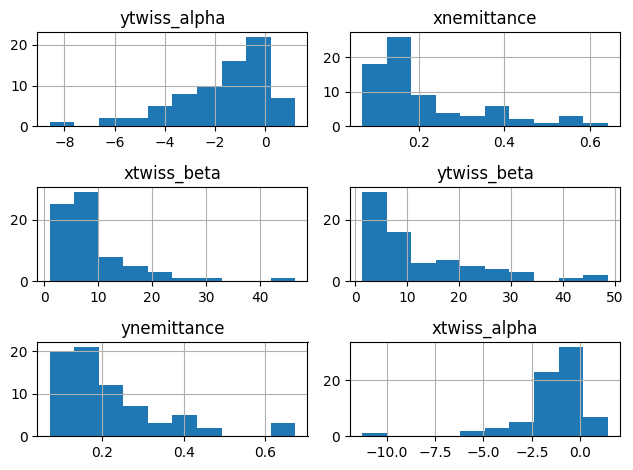

In [10]:
elem = "BDS_BTS:QV_D5501"
CSs[elem].T.hist()
plt.tight_layout()
print(CSs[elem].T.mean())
print(CSs[elem].T.std())
CSs[elem]

### organize training data

In [11]:
f0_T1 = {}
f0_T2 = {}
f0_T3 = {}
f0_T4 = {}
f0_xy = {}
f0_Qsim = {}
f0_Qerr = {}
f0_Qmeas = {}
f0_weight = {}
for bpm in BPMs:
    f0_T1    [bpm] = []
    f0_T2    [bpm] = []
    f0_T3    [bpm] = []
    f0_T4    [bpm] = []
    f0_xy    [bpm] = []
    f0_Qsim  [bpm] = []
    f0_Qerr  [bpm] = []
    f0_Qmeas [bpm] = []
    f0_weight[bpm] = []
    for i in range(len(training_data['measurement'])):
        meas = training_data['measurement'][i][bpm]
        sim  = training_data['simulation'][i][bpm]
        fit_loss = training_data['fit_result'][i]
        mask1 = meas.notna().all(axis=1)
        mask2 = sim.notna().all(axis=1)
        combined_mask = mask1 & mask2
        meas = meas[combined_mask]
        sim  = sim [combined_mask]
        n = len(meas)
        # if n/len(combined_mask) < 1:
        #     print(i, bpm, training_data['rel_path'][i])
        
        f0_T1    [bpm].append(np.vstack(meas['TISRAW1'].values) / meas["MAG"].values[:, None] *TIS161_coeffs[bpm][0] *1.1e-11 + 0.5)
        f0_T2    [bpm].append(np.vstack(meas['TISRAW2'].values) / meas["MAG"].values[:, None] *TIS161_coeffs[bpm][1] *1.1e-11 + 0.5)
        f0_T3    [bpm].append(np.vstack(meas['TISRAW3'].values) / meas["MAG"].values[:, None] *TIS161_coeffs[bpm][2] *1.1e-11 + 0.5)
        f0_T4    [bpm].append(np.vstack(meas['TISRAW4'].values) / meas["MAG"].values[:, None] *TIS161_coeffs[bpm][3] *1.1e-11 + 0.5)
        f0_xy    [bpm].append(meas[['XPOS','YPOS']])
        f0_Qsim  [bpm].append( sim['beamQ'])
        f0_Qerr  [bpm].append(meas['beamQ_err'])
        f0_Qmeas [bpm].append(meas['beamQ'])
        f0_weight[bpm].append(np.ones(n)/(fig_loss_mean+fit_loss))
                    
    f0_T1    [bpm] = np.concatenate(f0_T1    [bpm])
    f0_T2    [bpm] = np.concatenate(f0_T2    [bpm])
    f0_T3    [bpm] = np.concatenate(f0_T3    [bpm])
    f0_T4    [bpm] = np.concatenate(f0_T4    [bpm])
    f0_xy    [bpm] = np.concatenate(f0_xy    [bpm])
    f0_Qsim  [bpm] = np.concatenate(f0_Qsim  [bpm])
    f0_Qerr  [bpm] = np.concatenate(f0_Qerr  [bpm])
    f0_Qmeas [bpm] = np.concatenate(f0_Qmeas [bpm])
    f0_weight[bpm] = np.concatenate(f0_weight[bpm])
    f0_weight[bpm] = f0_weight[bpm]/f0_weight[bpm].mean()
    if bpm not in ['BDS_BTS:BPM_D5513','BDS_BTS:BPM_D5565']:
         f0_weight[bpm] = f0_weight[bpm]/len(f0_weight[bpm])  #before BPM_D5513, ISAAC scans are duplicated data

    assert len(f0_T1[bpm]) == len(f0_xy[bpm]) == len(f0_Qsim[bpm]) == len(f0_Qerr[bpm]) == len(f0_Qmeas[bpm])== len(f0_Qmeas[bpm])
    print(bpm, len(f0_T1[bpm]))

LS3_BTS:BPM_D4753 601
LS3_BTS:BPM_D4769 601
LS3_BTS:BPM_D4843 601
LS3_BTS:BPM_D4886 601
LS3_BTS:BPM_D4968 601
LS3_BTS:BPM_D5010 601
LS3_BTS:BPM_D5092 601
LS3_BTS:BPM_D5134 601
LS3_BTS:BPM_D5216 601
LS3_BTS:BPM_D5259 601
LS3_BTS:BPM_D5340 601
LS3_BTS:BPM_D5381 601
LS3_BTS:BPM_D5430 601
LS3_BTS:BPM_D5445 601
BDS_BTS:BPM_D5499 601
BDS_BTS:BPM_D5513 596
BDS_BTS:BPM_D5565 596


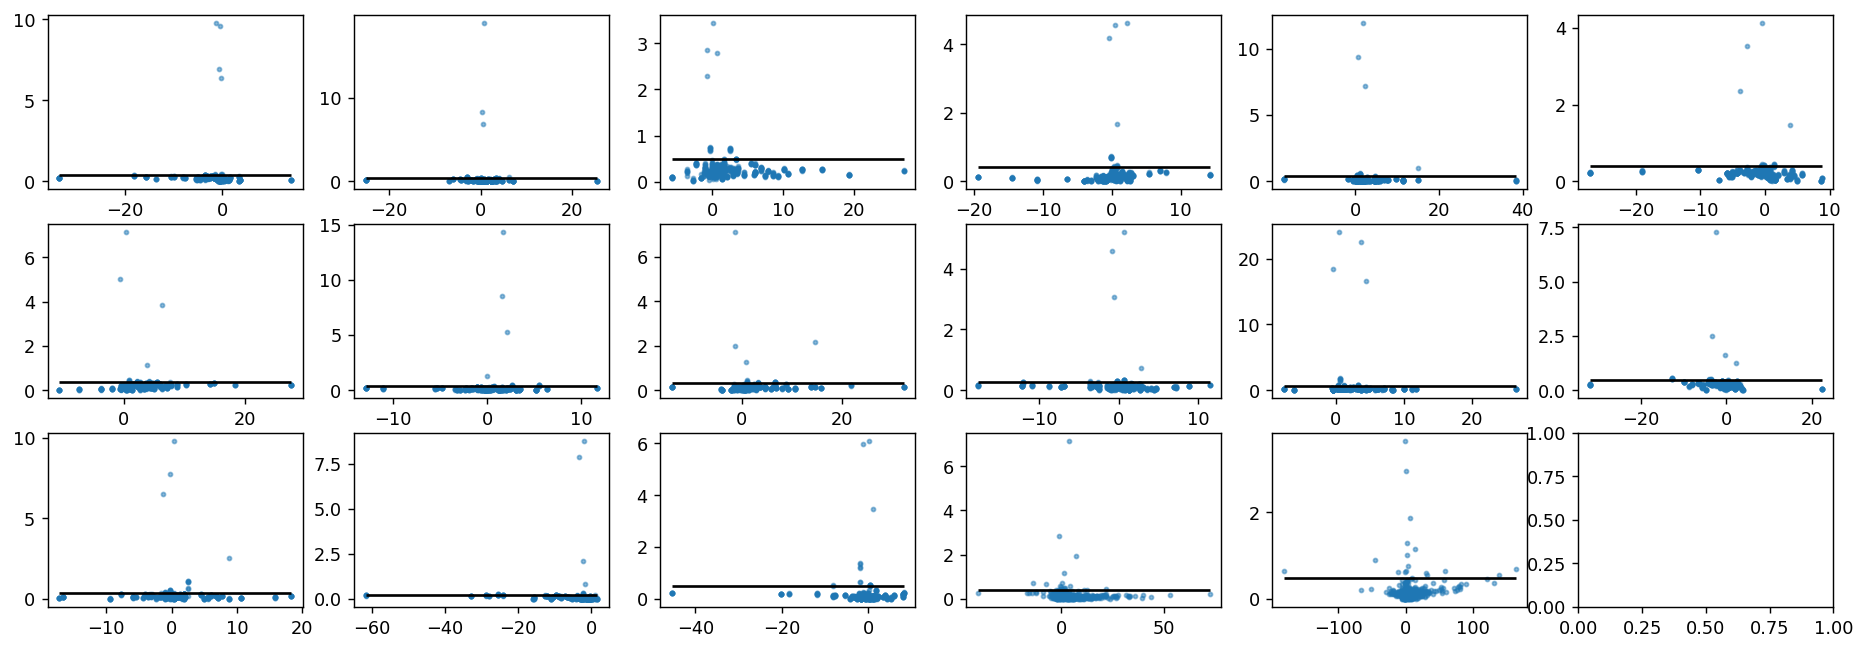

In [12]:
fig,ax = plt.subplots(3,6,figsize=(18,6),dpi=128)
ax = ax.flatten()
for i,bpm in enumerate(BPMs):
    loss =  np.sqrt((f0_Qmeas[bpm]-f0_Qsim[bpm])**2/(np.abs(f0_Qsim[bpm])+5)**2)
    cut = np.sort(loss)[int(0.97*len(loss))] 
    mask = loss < cut
    ax[i].scatter(f0_Qsim[bpm],loss,alpha=0.5,label=bpm[8:],s=5)
    ax[i].hlines(cut,min(f0_Qsim[bpm]),max(f0_Qsim[bpm]),'k')
    f0_T1    [bpm] = f0_T1    [bpm][mask]
    f0_T2    [bpm] = f0_T2    [bpm][mask]
    f0_T3    [bpm] = f0_T3    [bpm][mask]
    f0_T4    [bpm] = f0_T4    [bpm][mask]
    f0_xy    [bpm] = f0_xy    [bpm][mask]
    f0_Qsim  [bpm] = f0_Qsim  [bpm][mask]
    f0_Qerr  [bpm] = f0_Qerr  [bpm][mask]
    f0_Qmeas [bpm] = f0_Qmeas [bpm][mask]
    f0_weight[bpm] = f0_weight[bpm][mask]

In [13]:
for bpm in BPMs:
    p = np.random.permutation(np.arange(len(f0_T1[bpm])))
    f0_T1    [bpm] = f0_T1    [bpm][p]
    f0_T2    [bpm] = f0_T2    [bpm][p]
    f0_T3    [bpm] = f0_T3    [bpm][p]
    f0_T4    [bpm] = f0_T4    [bpm][p]
    f0_xy    [bpm] = f0_xy    [bpm][p]
    f0_Qsim  [bpm] = f0_Qsim  [bpm][p]
    f0_Qerr  [bpm] = f0_Qerr  [bpm][p]
    f0_Qmeas [bpm] = f0_Qmeas [bpm][p]
    f0_weight[bpm] = f0_weight[bpm][p]

# High data fidelity

In [14]:
training_data = pickle.load(open(data_path+'[fidel1]BDS_beamQ_training_data_from_ISAAC_PMver0.pkl','rb'))

In [15]:
f1_T1 = {}
f1_T2 = {}
f1_T3 = {}
f1_T4 = {}
f1_xy = {}
f1_Qsim = {}
f1_Qerr = {}
f1_Qmeas = {}
f1_weight = {}
for bpm in BPMs:
    f1_T1    [bpm] = []
    f1_T2    [bpm] = []
    f1_T3    [bpm] = []
    f1_T4    [bpm] = []
    f1_xy    [bpm] = []
    f1_Qsim  [bpm] = []
    f1_Qerr  [bpm] = []
    f1_Qmeas [bpm] = []
    f1_weight[bpm] = []
    for i in range(len(training_data['measurement'])):
        meas = training_data['measurement'][i][bpm]
        sim  = training_data['simulation'][i][bpm]
        if len(meas['TISRAW1'].values) == 0:
            continue
        fit_loss = training_data['fit_result'][i]
        mask1 = meas.notna().all(axis=1)
        mask2 = sim.notna().all(axis=1)
        combined_mask = mask1 & mask2
        meas = meas[combined_mask]
        sim  = sim [combined_mask]
        n = len(meas)
        # if n/len(combined_mask) < 1:
        #     print(i, bpm, training_data['rel_path'][i])
        
        f1_T1    [bpm].append(np.vstack(meas['TISRAW1'].values) / meas["MAG"].values[:, None] *TIS161_coeffs[bpm][0] *1.1e-11 + 0.5)
        f1_T2    [bpm].append(np.vstack(meas['TISRAW2'].values) / meas["MAG"].values[:, None] *TIS161_coeffs[bpm][1] *1.1e-11 + 0.5)
        f1_T3    [bpm].append(np.vstack(meas['TISRAW3'].values) / meas["MAG"].values[:, None] *TIS161_coeffs[bpm][2] *1.1e-11 + 0.5)
        f1_T4    [bpm].append(np.vstack(meas['TISRAW4'].values) / meas["MAG"].values[:, None] *TIS161_coeffs[bpm][3] *1.1e-11 + 0.5)
        f1_xy    [bpm].append(meas[['XPOS','YPOS']])
        f1_Qsim  [bpm].append( sim['beamQ'])
        f1_Qerr  [bpm].append(meas['beamQ_err'])
        f1_Qmeas [bpm].append(meas['beamQ'])
        f1_weight[bpm].append(np.ones(n)/(fig_loss_mean+fit_loss))
                    
    f1_T1    [bpm] = np.concatenate(f1_T1    [bpm])
    f1_T2    [bpm] = np.concatenate(f1_T2    [bpm])
    f1_T3    [bpm] = np.concatenate(f1_T3    [bpm])
    f1_T4    [bpm] = np.concatenate(f1_T4    [bpm])
    f1_xy    [bpm] = np.concatenate(f1_xy    [bpm])
    f1_Qsim  [bpm] = np.concatenate(f1_Qsim  [bpm])
    f1_Qerr  [bpm] = np.concatenate(f1_Qerr  [bpm])
    f1_Qmeas [bpm] = np.concatenate(f1_Qmeas [bpm])
    f1_weight[bpm] = np.concatenate(f1_weight[bpm])
    f1_weight[bpm] = f1_weight[bpm]/f1_weight[bpm].mean()

    assert len(f1_T1[bpm]) == len(f1_xy[bpm]) == len(f1_Qsim[bpm]) == len(f1_Qerr[bpm]) == len(f1_Qmeas[bpm])== len(f1_Qmeas[bpm])
    print(bpm, len(f1_T1[bpm]))

LS3_BTS:BPM_D4753 387
LS3_BTS:BPM_D4769 387
LS3_BTS:BPM_D4843 387
LS3_BTS:BPM_D4886 387
LS3_BTS:BPM_D4968 387
LS3_BTS:BPM_D5010 387
LS3_BTS:BPM_D5092 387
LS3_BTS:BPM_D5134 387
LS3_BTS:BPM_D5216 387
LS3_BTS:BPM_D5259 387
LS3_BTS:BPM_D5340 387
LS3_BTS:BPM_D5381 387
LS3_BTS:BPM_D5430 387
LS3_BTS:BPM_D5445 387
BDS_BTS:BPM_D5499 387
BDS_BTS:BPM_D5513 387
BDS_BTS:BPM_D5565 387


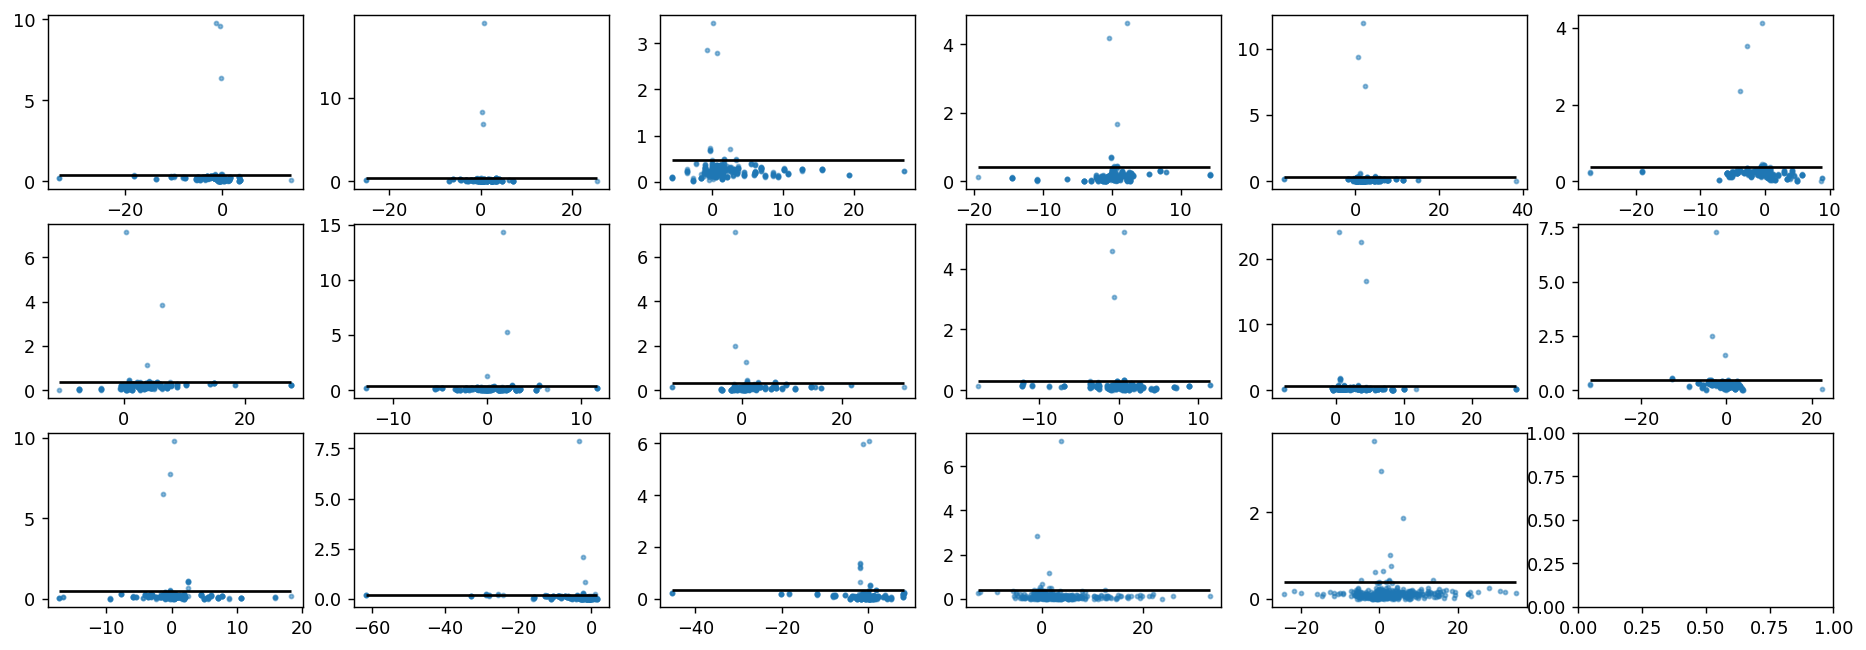

In [16]:
fig,ax = plt.subplots(3,6,figsize=(18,6),dpi=128)
ax = ax.flatten()
for i,bpm in enumerate(BPMs):
    loss =  np.sqrt((f1_Qmeas[bpm]-f1_Qsim[bpm])**2/(np.abs(f1_Qsim[bpm])+5)**2)
    cut = np.sort(loss)[int(0.97*len(loss))] 
    mask = loss < cut
    ax[i].scatter(f1_Qsim[bpm],loss,alpha=0.5,label=bpm[8:],s=5)
    ax[i].hlines(cut,min(f1_Qsim[bpm]),max(f1_Qsim[bpm]),'k')
    f1_T1    [bpm] = f1_T1    [bpm][mask]
    f1_T2    [bpm] = f1_T2    [bpm][mask]
    f1_T3    [bpm] = f1_T3    [bpm][mask]
    f1_T4    [bpm] = f1_T4    [bpm][mask]
    f1_xy    [bpm] = f1_xy    [bpm][mask]
    f1_Qsim  [bpm] = f1_Qsim  [bpm][mask]
    f1_Qerr  [bpm] = f1_Qerr  [bpm][mask]
    f1_Qmeas [bpm] = f1_Qmeas [bpm][mask]
    f1_weight[bpm] = f1_weight[bpm][mask]

In [17]:
for bpm in BPMs:
    p = np.random.permutation(np.arange(len(f1_T1[bpm])))
    f1_T1    [bpm] = f1_T1    [bpm][p]
    f1_T2    [bpm] = f1_T2    [bpm][p]
    f1_T3    [bpm] = f1_T3    [bpm][p]
    f1_T4    [bpm] = f1_T4    [bpm][p]
    f1_xy    [bpm] = f1_xy    [bpm][p]
    f1_Qsim  [bpm] = f1_Qsim  [bpm][p]
    f1_Qerr  [bpm] = f1_Qerr  [bpm][p]
    f1_Qmeas [bpm] = f1_Qmeas [bpm][p]
    f1_weight[bpm] = f1_weight[bpm][p]

# prior data

In [18]:
prior_data_files = [
     #'20231117_Ca_LS3exit_beamQ_PM5567_PMver0.pkl',
     '20231130_36Ar18_afterVslitAdjust_LS3exit_beamQ_corrScan_PM4771_PM5567_PMver0.pkl',
     '20231130_36Ar18_afterVslitAdjust_LS3exit_beamQ_PM4771_PM5567_PMver0.pkl',
     '20231130_36Ar18_beforeVslitAdjust_LS3exit_beamQ_PM4771_PM5567_PMver0.pkl',
     '20240119_82Se32_LS3exit_beamQ_PM4771_PM5567_PMver0.pkl',
     '20240321_BDSentrance_corrScan_beamQ_PM5567_PMver0.pkl',
     '20240709_BDSentrance_beamQ_PM5567_PMver0.pkl']

prior_data = {'measurement':[],
              'simulation':[],
              'fit_loss':[]}
for f in prior_data_files:
    tmp = pickle.load(open(data_path+f,'rb'))
    n = len(tmp['measurement'])
    assert n == len(tmp['simulation'])
    prior_data['measurement'].append(tmp['measurement'])
    prior_data['simulation'].append(tmp['simulation'])
    prior_data['fit_loss'].append([tmp['fit_loss']]*n)

for k in ['measurement','simulation']:
    prior_data[k] = pd.concat(prior_data[k],ignore_index=True)
prior_data['fit_loss'] = np.concatenate(prior_data['fit_loss'])

##### 95% cut based on normalized beamQ loss

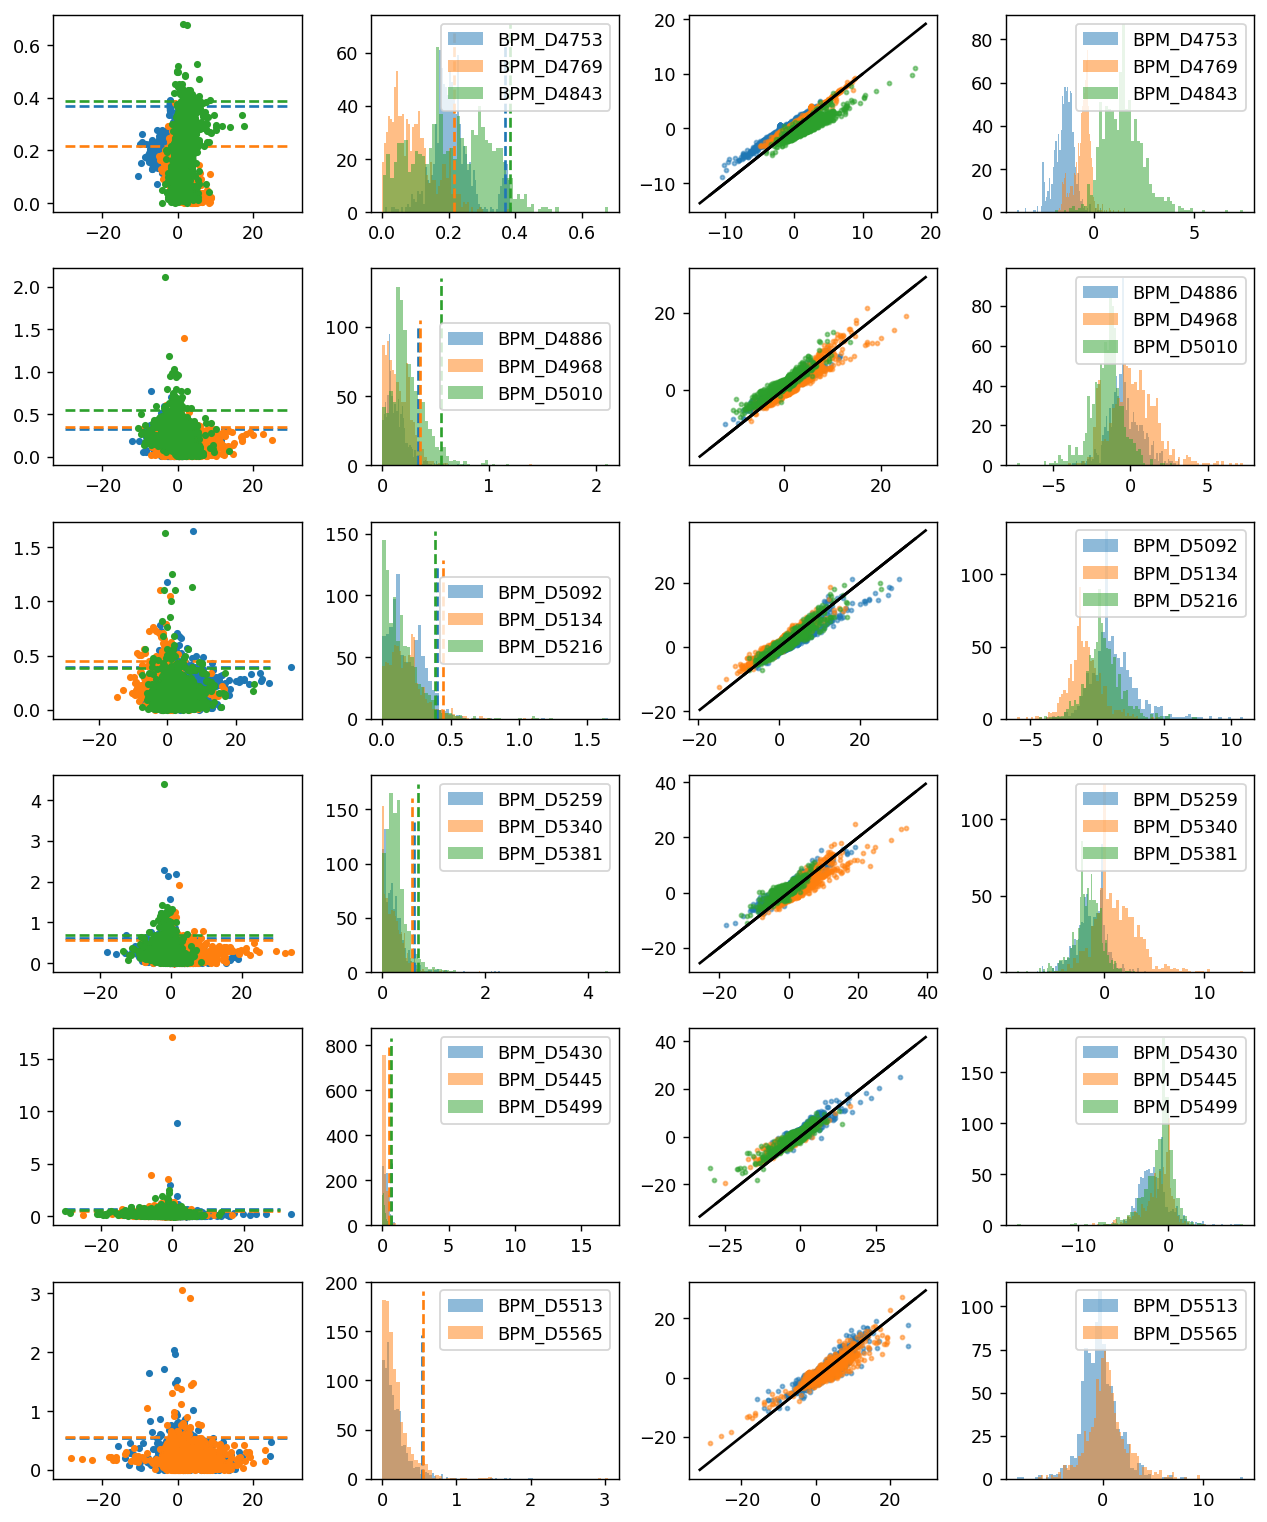

In [19]:
fig,ax = plt.subplots(6,4,figsize=(10,2*6), dpi=128)
BPMs = sort_by_Dnum(list(BPMs))
for i,bpm in enumerate(BPMs):
    meas = prior_data['measurement'][bpm]
    mask = prior_data['measurement'][bpm].notna().all(axis=1)
    meas = meas[mask]
    fit_loss = prior_data['fit_loss'][mask]
    sim  = prior_data['simulation'][bpm][mask]
    loss =  np.sqrt((meas['beamQ']-sim['beamQ'])**2/(np.abs(sim['beamQ'])+5)**2)
    cut = np.sort(loss)[int(0.95*len(loss))] 
    mask = loss < cut
    prior_data[bpm] = {'measurement':meas[mask],
                       'simulation':sim[mask],
                       'fit_loss':fit_loss[mask]}
    
    n = int(i/(len(BPMs)/6))
    c = 'C'+str(i%3)
    ax[n,0].plot(sim['beamQ'],loss,'.',c=c,label=bpm[8:])
    ax[n,0].plot([-30,30],[cut,cut],c=c,ls='--')
    ax[n,1].hist(loss,bins=64,alpha=0.5,color=c,label=bpm[8:])
    ax[n,1].plot([cut,cut],ax[n,1].get_ylim(),c=c,ls='--')
    ax[n,2].scatter(prior_data[bpm]['simulation']['beamQ'],prior_data[bpm]['measurement']['beamQ'],alpha=0.5,color=c,label=bpm[8:],s=5)
    ax[n,2].plot(ax[n,2].get_xlim(),ax[n,2].get_xlim(),color='k')
    ax[n,3].hist(prior_data[bpm]['simulation']['beamQ']-prior_data[bpm]['measurement']['beamQ'],bins=64,alpha=0.5,color=c,label=bpm[8:])
    
for i in range(6):
    for j in [1,3]:
        ax[i,j].legend()
plt.tight_layout()

In [20]:
prior_T1 = {}
prior_T2 = {}
prior_T3 = {}
prior_T4 = {}
prior_xy = {}
prior_Qsim = {}
prior_Qerr = {}
prior_Qmeas = {}
prior_weight = {}
np.random.seed(0)

for bpm in BPMs:
    meas = prior_data[bpm]['measurement']
    sim  = prior_data[bpm]['simulation']
    n_data = len(meas)
    print(bpm,n_data)
    p = np.random.permutation(np.arange(n_data))
    T1 = np.vstack(meas['TISRAW1'].values)/ meas["MAG"].values[:, None] *TIS161_coeffs[bpm][0] *1.1e-11 + 0.5
    T2 = np.vstack(meas['TISRAW2'].values)/ meas["MAG"].values[:, None] *TIS161_coeffs[bpm][1] *1.1e-11 + 0.5
    T3 = np.vstack(meas['TISRAW3'].values)/ meas["MAG"].values[:, None] *TIS161_coeffs[bpm][2] *1.1e-11 + 0.5
    T4 = np.vstack(meas['TISRAW4'].values)/ meas["MAG"].values[:, None] *TIS161_coeffs[bpm][3] *1.1e-11 + 0.5
    prior_T1   [bpm] = T1[p]
    prior_T2   [bpm] = T2[p]
    prior_T3   [bpm] = T3[p]
    prior_T4   [bpm] = T4[p]
    prior_xy   [bpm] = np.stack(meas[['XPOS','YPOS']].values[p])
    prior_Qsim [bpm] = sim['beamQ'  ].values[p]
    prior_Qmeas[bpm] = meas['beamQ'  ].values[p]
    prior_Qerr [bpm] = meas['beamQ_err'].values[p]
    prior_weight[bpm] = 1/(prior_data[bpm]['fit_loss'][p] + fig_loss_mean)
    prior_weight[bpm] = prior_weight[bpm]/prior_weight[bpm].mean()
    assert len(prior_T1[bpm])==len(prior_Qsim[bpm])==len(prior_weight[bpm])

LS3_BTS:BPM_D4753 909
LS3_BTS:BPM_D4769 909
LS3_BTS:BPM_D4843 908
LS3_BTS:BPM_D4886 908
LS3_BTS:BPM_D4968 909
LS3_BTS:BPM_D5010 909
LS3_BTS:BPM_D5092 909
LS3_BTS:BPM_D5134 909
LS3_BTS:BPM_D5216 909
LS3_BTS:BPM_D5259 909
LS3_BTS:BPM_D5340 909
LS3_BTS:BPM_D5381 909
LS3_BTS:BPM_D5430 909
LS3_BTS:BPM_D5445 909
BDS_BTS:BPM_D5499 909
BDS_BTS:BPM_D5513 930
BDS_BTS:BPM_D5565 930


In [21]:
for bpm in BPMs:
    prior_T1    [bpm] = np.concatenate((prior_T1    [bpm],f0_T1    [bpm]))
    prior_T2    [bpm] = np.concatenate((prior_T2    [bpm],f0_T2    [bpm]))
    prior_T3    [bpm] = np.concatenate((prior_T3    [bpm],f0_T3    [bpm]))
    prior_T4    [bpm] = np.concatenate((prior_T4    [bpm],f0_T4    [bpm]))
    prior_xy    [bpm] = np.concatenate((prior_xy    [bpm],f0_xy    [bpm]))
    prior_Qsim  [bpm] = np.concatenate((prior_Qsim  [bpm],f0_Qsim  [bpm]))
    prior_Qerr  [bpm] = np.concatenate((prior_Qerr  [bpm],f0_Qerr  [bpm]))
    prior_Qmeas [bpm] = np.concatenate((prior_Qmeas [bpm],f0_Qmeas [bpm]))
    prior_weight[bpm] = np.concatenate((prior_weight[bpm],f0_weight[bpm]))

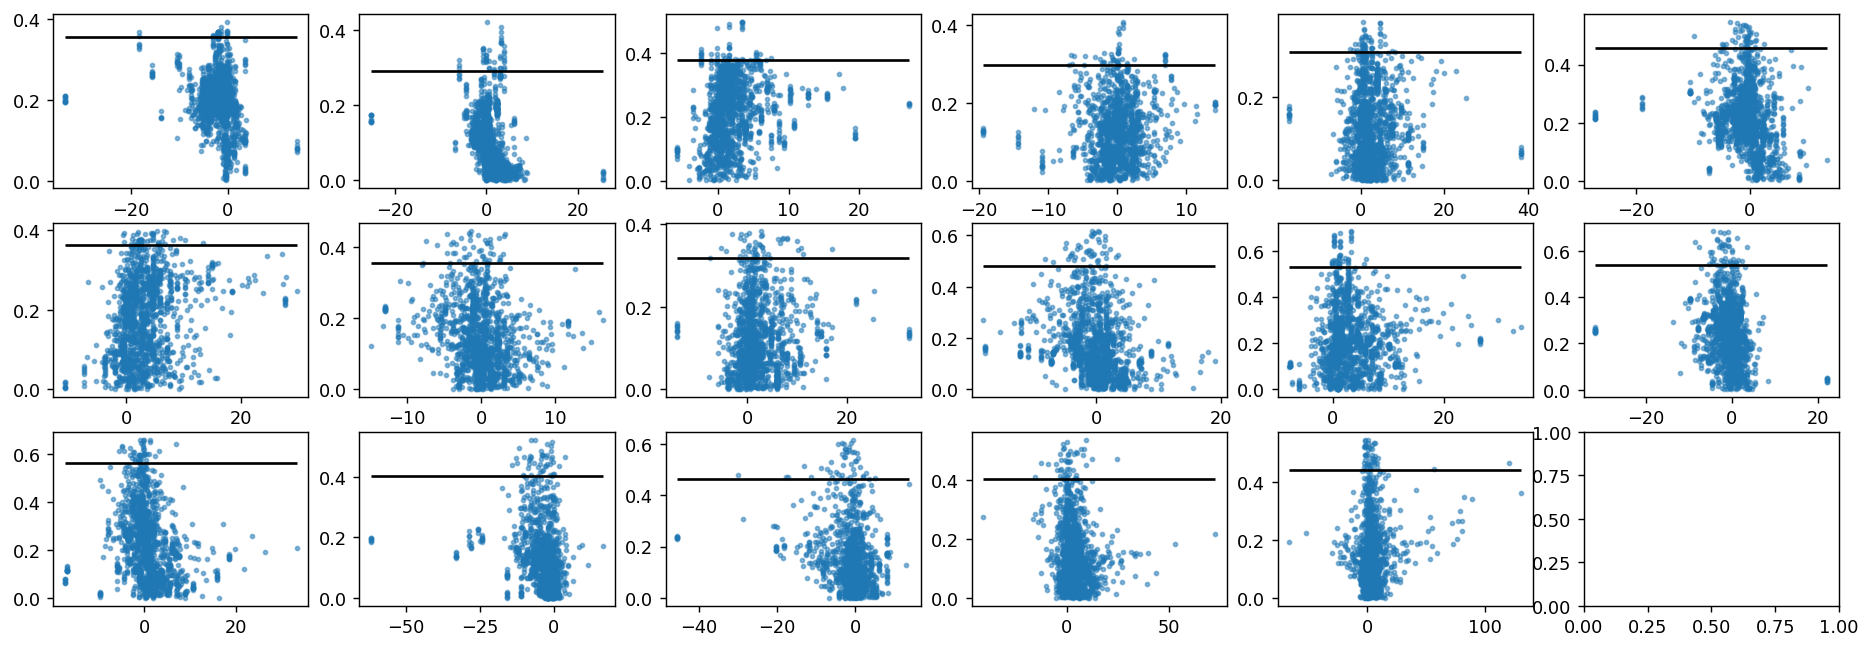

In [22]:
fig,ax = plt.subplots(3,6,figsize=(18,6),dpi=128)
ax = ax.flatten()
for i,bpm in enumerate(BPMs):
    loss =  np.sqrt((prior_Qmeas[bpm]-prior_Qsim[bpm])**2/(np.abs(prior_Qsim[bpm])+5)**2)
    cut = np.sort(loss)[int(0.97*len(loss))] 
    mask = loss < cut
    ax[i].scatter(prior_Qsim[bpm],loss,alpha=0.5,label=bpm[8:],s=5)
    ax[i].hlines(cut,min(prior_Qsim[bpm]),max(prior_Qsim[bpm]),'k')
    prior_T1    [bpm] = prior_T1    [bpm][mask]
    prior_T2    [bpm] = prior_T2    [bpm][mask]
    prior_T3    [bpm] = prior_T3    [bpm][mask]
    prior_T4    [bpm] = prior_T4    [bpm][mask]
    prior_xy    [bpm] = prior_xy    [bpm][mask]
    prior_Qsim  [bpm] = prior_Qsim  [bpm][mask]
    prior_Qerr  [bpm] = prior_Qerr  [bpm][mask]
    prior_Qmeas [bpm] = prior_Qmeas [bpm][mask]
    prior_weight[bpm] = prior_weight[bpm][mask]

In [23]:
for bpm in BPMs:
    p = np.random.permutation(np.arange(len(prior_T1[bpm])))
    prior_T1    [bpm] = torch.tensor(prior_T1    [bpm][p],dtype=_dtype)
    prior_T2    [bpm] = torch.tensor(prior_T2    [bpm][p],dtype=_dtype)
    prior_T3    [bpm] = torch.tensor(prior_T3    [bpm][p],dtype=_dtype)
    prior_T4    [bpm] = torch.tensor(prior_T4    [bpm][p],dtype=_dtype)
    prior_xy    [bpm] = torch.tensor(prior_xy    [bpm][p],dtype=_dtype)
    prior_Qsim  [bpm] = torch.tensor(prior_Qsim  [bpm][p],dtype=_dtype)
    prior_Qerr  [bpm] = torch.tensor(prior_Qerr  [bpm][p],dtype=_dtype)
    prior_Qmeas [bpm] = torch.tensor(prior_Qmeas [bpm][p],dtype=_dtype)
    prior_weight[bpm] = torch.tensor(prior_weight[bpm][p],dtype=_dtype)

In [24]:
# fig,ax = plt.subplots(len(BPMs),2,figsize=(8, 2*len(BPMs)))

# for ibpm,bpm in enumerate(BPMs):
    
#     min_values = [min(lst) for lst in prior_T1[bpm]]
#     max_values = [max(lst) for lst in prior_T1[bpm]]
#     ax[ibpm,0].hist(min_values, bins=64, alpha=0.6, label=f"TISRAW1")
#     ax[ibpm,1].hist(max_values, bins=64, alpha=0.6, label=f"TISRAW1")
    
#     min_values = [min(lst) for lst in prior_T2[bpm]]
#     max_values = [max(lst) for lst in prior_T2[bpm]]
#     ax[ibpm,0].hist(min_values, bins=64, alpha=0.6, label=f"TISRAW2")
#     ax[ibpm,1].hist(max_values, bins=64, alpha=0.6, label=f"TISRAW2")
    
#     min_values = [min(lst) for lst in prior_T3[bpm]]
#     max_values = [max(lst) for lst in prior_T3[bpm]]
#     ax[ibpm,0].hist(min_values, bins=64, alpha=0.6, label=f"TISRAW3")
#     ax[ibpm,1].hist(max_values, bins=64, alpha=0.6, label=f"TISRAW3")
    
#     min_values = [min(lst) for lst in prior_T4[bpm]]
#     max_values = [max(lst) for lst in prior_T4[bpm]]
#     ax[ibpm,0].hist(min_values, bins=64, alpha=0.6, label=f"TISRAW4")
#     ax[ibpm,1].hist(max_values, bins=64, alpha=0.6, label=f"TISRAW4")
    
#     ax[ibpm,0].set_title(f"MinTISRAWn {bpm[8:]}")
#     ax[ibpm,1].set_title(f"MaxTISRAWn {bpm[8:]}")
#     ax[ibpm,0].legend()
#     ax[ibpm,1].legend()
# plt.tight_layout()

# Split data

In [25]:
n_data = {}
n_train = {}
n_val = {}
for bpm in BPMs:
    n_data[bpm] = len(f1_T1[bpm])
    n_train[bpm] = int(0.7*n_data[bpm]) - 1
    n_val[bpm] = n_data[bpm] - n_train[bpm]
    print(bpm, n_data[bpm], n_train[bpm], n_val[bpm])

LS3_BTS:BPM_D4753 375 261 114
LS3_BTS:BPM_D4769 375 261 114
LS3_BTS:BPM_D4843 375 261 114
LS3_BTS:BPM_D4886 375 261 114
LS3_BTS:BPM_D4968 375 261 114
LS3_BTS:BPM_D5010 375 261 114
LS3_BTS:BPM_D5092 375 261 114
LS3_BTS:BPM_D5134 375 261 114
LS3_BTS:BPM_D5216 375 261 114
LS3_BTS:BPM_D5259 375 261 114
LS3_BTS:BPM_D5340 375 261 114
LS3_BTS:BPM_D5381 375 261 114
LS3_BTS:BPM_D5430 375 261 114
LS3_BTS:BPM_D5445 375 261 114
BDS_BTS:BPM_D5499 375 261 114
BDS_BTS:BPM_D5513 375 261 114
BDS_BTS:BPM_D5565 375 261 114


In [26]:
train_T1 = {}
train_T2 = {}
train_T3 = {}
train_T4 = {}
train_xy = {}
train_Qsim = {}
train_Qerr = {}
train_Qmeas = {}
train_weight = {}

val_T1 = {}
val_T2 = {}
val_T3 = {}
val_T4 = {}
val_xy = {}
val_Qsim = {}
val_Qerr = {}
val_Qmeas = {}
val_weight = {}

for bpm in BPMs:
    val_T1    [bpm] = f1_T1    [bpm][:n_val[bpm]]
    val_T2    [bpm] = f1_T2    [bpm][:n_val[bpm]]
    val_T3    [bpm] = f1_T3    [bpm][:n_val[bpm]]
    val_T4    [bpm] = f1_T4    [bpm][:n_val[bpm]]
    val_xy    [bpm] = f1_xy    [bpm][:n_val[bpm]]
    val_Qsim  [bpm] = f1_Qsim  [bpm][:n_val[bpm]]
    val_Qerr  [bpm] = f1_Qerr  [bpm][:n_val[bpm]]
    val_Qmeas [bpm] = f1_Qmeas [bpm][:n_val[bpm]]
    val_weight[bpm] = f1_weight[bpm][:n_val[bpm]]
    
    train_T1    [bpm] = f1_T1    [bpm][n_val[bpm]:]
    train_T2    [bpm] = f1_T2    [bpm][n_val[bpm]:]
    train_T3    [bpm] = f1_T3    [bpm][n_val[bpm]:]
    train_T4    [bpm] = f1_T4    [bpm][n_val[bpm]:]
    train_xy    [bpm] = f1_xy    [bpm][n_val[bpm]:]
    train_Qsim  [bpm] = f1_Qsim  [bpm][n_val[bpm]:]
    train_Qerr  [bpm] = f1_Qerr  [bpm][n_val[bpm]:]
    train_Qmeas [bpm] = f1_Qmeas [bpm][n_val[bpm]:]
    train_weight[bpm] = f1_weight[bpm][n_val[bpm]:]

# train model

In [27]:
models = {}
history = {}

for bpm in BPMs:
    print(bpm)
    fname = bpm.replace('_D','')[-7:]
    if not os.path.exists(fname):
        os.makedirs(fname)
    model_info = {'F':1,
                  'dtype':_dtype}
    model = TISRAW2BPMQ_model(**model_info)
    if bpm in val_T1:
        hist_,model_state_dict_,opt_state_dict_ = train_TISRAW2BPMQ_model(
            model,epochs,lr,
            prior_T1[bpm],prior_T2[bpm],prior_T3[bpm],prior_T4[bpm],prior_xy[bpm],prior_Qsim[bpm],prior_Qerr[bpm],prior_weight[bpm],
            val_T1[bpm],val_T2[bpm],val_T3[bpm],val_T4[bpm],val_xy[bpm],val_Qsim[bpm],val_Qerr[bpm],val_weight[bpm],
            lr_scheduler = False,
            batch_size = int(0.1*len(prior_T1)),
            fname_model = fname+'/model_TISRAW2BPMQ.pt',
            fname_history = fname+'/history_TISRAW2BPMQ.pkl',
        )
    else:
        hist_,model_state_dict_,opt_state_dict_ = train_TISRAW2BPMQ_model(
            model,epochs,lr,
            prior_T1[bpm],prior_T2[bpm],prior_T3[bpm],prior_T4[bpm],prior_xy[bpm],prior_Qsim[bpm],prior_Qerr[bpm],prior_weight[bpm],
            validation_split = 0.3,
            lr_scheduler = False,
            batch_size = int(0.1*len(prior_T1)),
            fname_model = fname+'/model_TISRAW2BPMQ.pt',
            fname_history = fname+'/history_TISRAW2BPMQ.pkl',
        )
    if bpm in val_T1:
        hist_,model_state_dict_,opt_state_dict_ = train_TISRAW2BPMQ_model(
            model,epochs,lr,
            train_T1[bpm],train_T2[bpm],train_T3[bpm],train_T4[bpm],train_xy[bpm],train_Qsim[bpm],train_Qerr[bpm],train_weight[bpm],
            val_T1[bpm],val_T2[bpm],val_T3[bpm],val_T4[bpm],val_xy[bpm],val_Qsim[bpm],val_Qerr[bpm],val_weight[bpm],
            batch_size = int(0.1*len(train_T1)),
            optimizer_state_dict = opt_state_dict_,
            prev_history = hist_,
            fname_model = fname+'/model_TISRAW2BPMQ.pt',
            fname_history = fname+'/history_TISRAW2BPMQ.pkl',
        )
    hist_,model_state_dict_,opt_state_dict_ = train_TISRAW2BPMQ_model(
        model,int(0.1*epochs),0.01*lr,
        f1_T1[bpm],f1_T2[bpm],f1_T3[bpm],f1_T4[bpm],f1_xy[bpm],f1_Qsim[bpm],f1_Qerr[bpm],f1_weight[bpm],
        lr_scheduler = False,
        batch_size = int(0.1*len(f1_T1)),
        optimizer_state_dict = opt_state_dict_,
        prev_history = hist_,
        fname_model = fname+'/model_TISRAW2BPMQ.pt',
        fname_history = fname+'/history_TISRAW2BPMQ.pkl',
    )
    models[bpm] = model
    history[bpm] = hist_

LS3_BTS:BPM_D4753
LS3_BTS:BPM_D4769
LS3_BTS:BPM_D4843
LS3_BTS:BPM_D4886
LS3_BTS:BPM_D4968
LS3_BTS:BPM_D5010
LS3_BTS:BPM_D5092
LS3_BTS:BPM_D5134
LS3_BTS:BPM_D5216
LS3_BTS:BPM_D5259
LS3_BTS:BPM_D5340
LS3_BTS:BPM_D5381
LS3_BTS:BPM_D5430
LS3_BTS:BPM_D5445
BDS_BTS:BPM_D5499
BDS_BTS:BPM_D5513
BDS_BTS:BPM_D5565


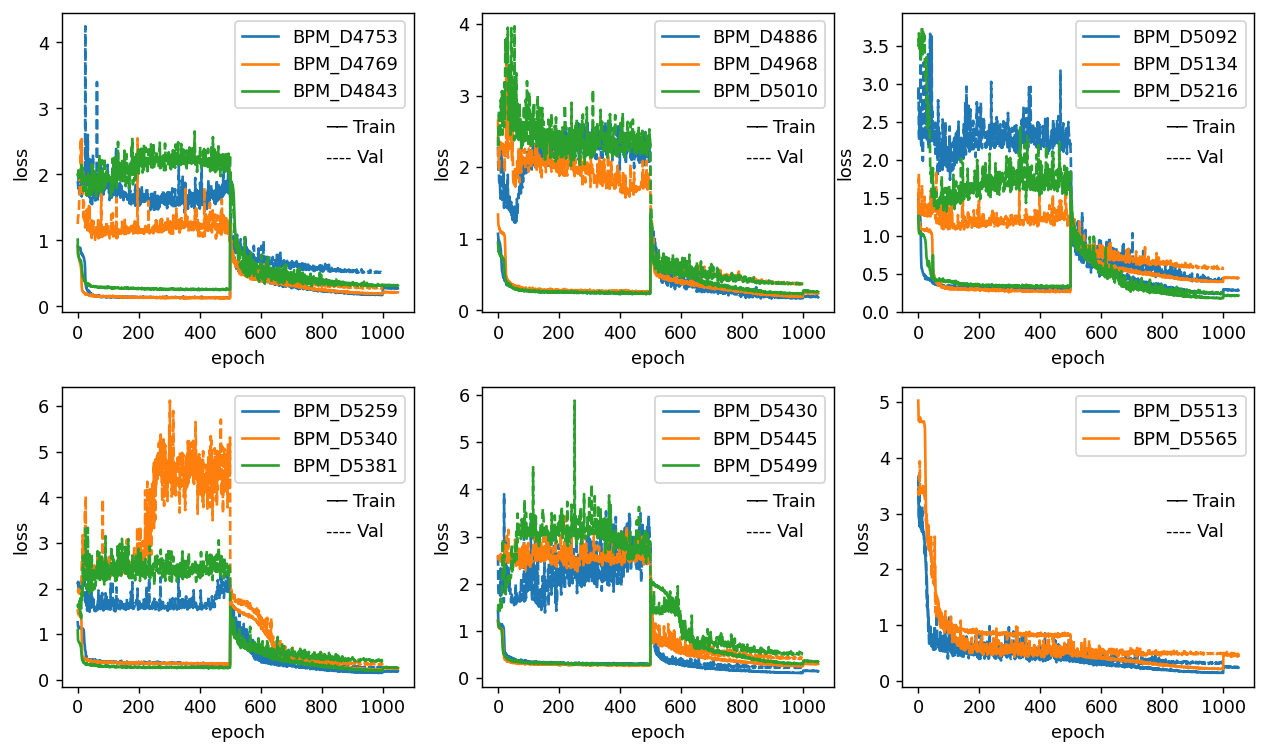

In [28]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6),dpi=128)  # Corrected figsize
ax = ax.flatten()

for i, bpm in enumerate(BPMs):    
    n = int(i/(len(BPMs)/6))
    c = 'C' + str(i % 3)
    ax[n].plot(history[bpm]['train_loss'], c=c, label=f'{bpm[8:]}')
    ax[n].plot(history[bpm]['val_loss'], '--', c=c)

for i in range(6):
    ax[i].set_xlabel('epoch')
    ax[i].set_ylabel('loss')
    ax[i].legend()
    xlim = ax[i].get_xlim()
    ylim = ax[i].get_ylim()
    ax[i].text(0.25*xlim[0]+0.75*xlim[1],0.4*ylim[0]+0.6*ylim[1], "── Train",ha='left')
    ax[i].text(0.25*xlim[0]+0.75*xlim[1],0.5*ylim[0]+0.5*ylim[1], "---- Val",ha='left')

plt.tight_layout()
plt.show()

In [29]:
train_T1[bpm]

array([[0.53241266, 0.52300382, 0.50000362, ..., 0.54489738, 0.54358536,
        0.55524856],
       [0.73316584, 0.66258328, 0.55556173, ..., 0.67972767, 0.74014137,
        0.76232423],
       [0.67985449, 0.58285942, 0.46021093, ..., 0.72360716, 0.75618021,
        0.74318739],
       ...,
       [0.65347224, 0.55925883, 0.44546041, ..., 0.71230588, 0.73880234,
        0.71986038],
       [0.68229402, 0.58589813, 0.46166848, ..., 0.72539859, 0.75894922,
        0.74611351],
       [0.78599315, 0.71242259, 0.6283886 , ..., 0.84466607, 0.88310201,
        0.86679436]])

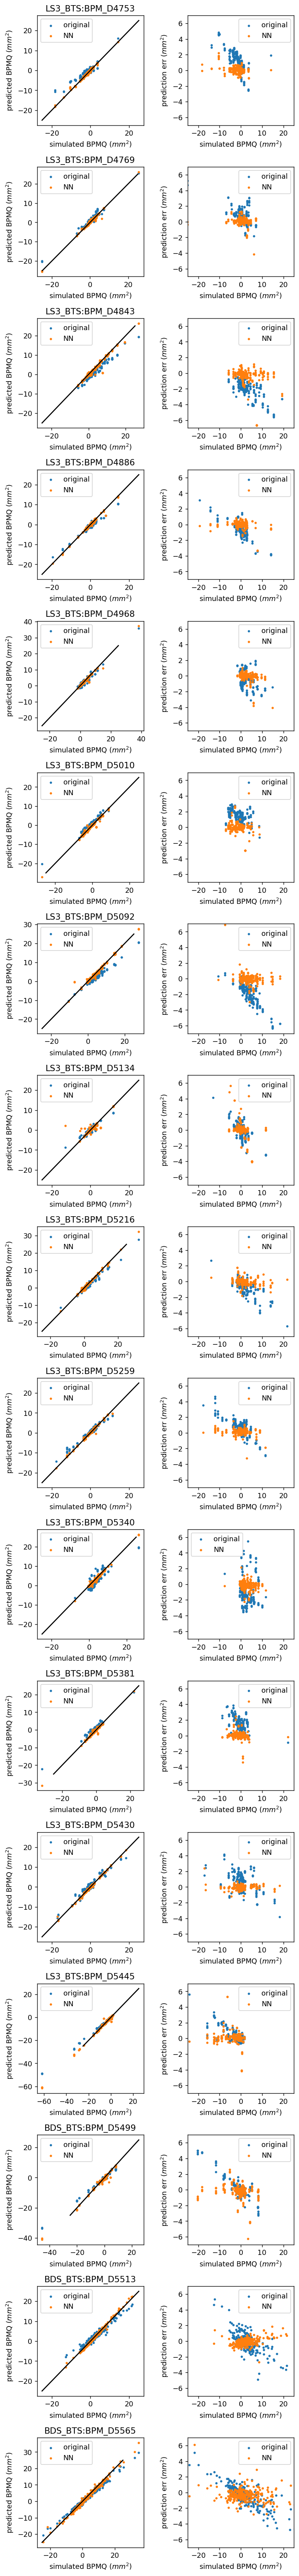

In [30]:
train_Qpred = {}
with torch.no_grad():
    for bpm in BPMs:
        model = models[bpm]
        feature, train_Qpred[bpm] = model(torch.tensor(train_T1[bpm]),
                                          torch.tensor(train_T2[bpm]),
                                          torch.tensor(train_T3[bpm]),
                                          torch.tensor(train_T4[bpm]),
                                          torch.tensor(train_xy[bpm]))
        train_Qpred[bpm] = train_Qpred[bpm].view(-1).detach()

fig, ax = plt.subplots(len(BPMs), 2, figsize=(6, 3*len(BPMs)), dpi=128)  # Corrected figsize
for i, bpm in enumerate(BPMs):    
    ax[i,0].scatter(train_Qsim[bpm], train_Qmeas[bpm],label='original',s=5)
    ax[i,0].scatter(train_Qsim[bpm], train_Qpred[bpm],label='NN',s=5)
    ax[i,0].plot([-25, 25], [-25, 25], color='k')
    ax[i,0].set_xlabel('simulated BPMQ $(mm^2)$')
    ax[i,0].set_ylabel('predicted BPMQ $(mm^2)$')
    ax[i,0].legend()

    # Second subplot in the row
    ax[i,1].scatter(train_Qsim[bpm], train_Qmeas[bpm]-train_Qsim[bpm],label='original',s=5)
    ax[i,1].scatter(train_Qsim[bpm], train_Qpred[bpm]-train_Qsim[bpm],label='NN',s=5)
    ax[i,1].set_xlabel('simulated BPMQ $(mm^2)$')
    ax[i,1].set_ylabel('prediction err $(mm^2)$')
    ax[i,1].set_xlim(-25,25)
    ax[i,1].set_ylim(-7, 7)
    ax[i,1].legend()
    # Set a single title for each row on the first subplot
    ax[i, 0].set_title(bpm)
plt.tight_layout()

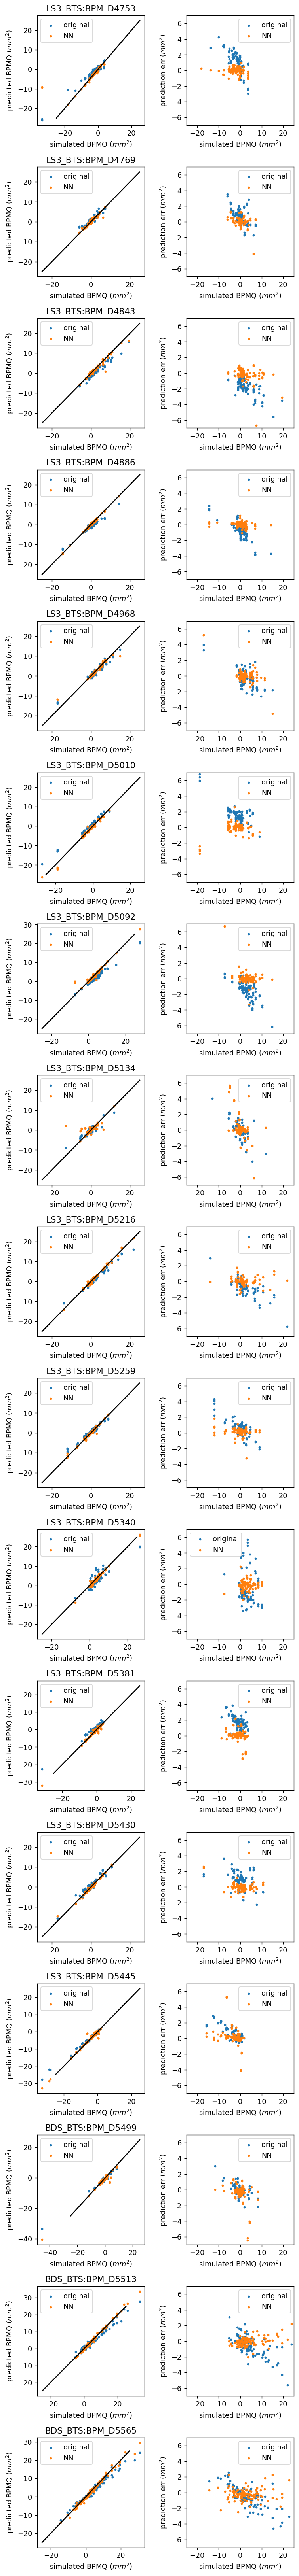

In [31]:
val_Qpred = {}
with torch.no_grad():
    for bpm in BPMs:
        model = models[bpm]
        feature, val_Qpred[bpm] = model(torch.tensor(val_T1[bpm]),
                                        torch.tensor(val_T2[bpm]),
                                        torch.tensor(val_T3[bpm]),
                                        torch.tensor(val_T4[bpm]),
                                        torch.tensor(val_xy[bpm]))
        val_Qpred[bpm] = val_Qpred[bpm].view(-1).detach()

fig, ax = plt.subplots(len(BPMs), 2, figsize=(6, 3*len(BPMs)), dpi=128)  # Corrected figsize
for i, bpm in enumerate(BPMs):    
    ax[i,0].scatter(val_Qsim[bpm], val_Qmeas[bpm],label='original',s=5)
    ax[i,0].scatter(val_Qsim[bpm], val_Qpred[bpm],label='NN',s=5)
    ax[i,0].plot([-25, 25], [-25, 25], color='k')
    ax[i,0].set_xlabel('simulated BPMQ $(mm^2)$')
    ax[i,0].set_ylabel('predicted BPMQ $(mm^2)$')
    ax[i,0].legend()

    # Second subplot in the row
    ax[i,1].scatter(val_Qsim[bpm], val_Qmeas[bpm]-val_Qsim[bpm],label='original',s=5)
    ax[i,1].scatter(val_Qsim[bpm], val_Qpred[bpm]-val_Qsim[bpm],label='NN',s=5)
    ax[i,1].set_xlabel('simulated BPMQ $(mm^2)$')
    ax[i,1].set_ylabel('prediction err $(mm^2)$')
    ax[i,1].set_xlim(-25,25)
    ax[i,1].set_ylim(-7, 7)
    ax[i,1].legend()
    # Set a single title for each row on the first subplot
    ax[i, 0].set_title(bpm)
plt.tight_layout()

# use NN as leading order model with feature extractor and use GP for BPMQ pred model with uncertainty

In [32]:
from botorch.models import SingleTaskGP
from botorch.fit import fit_gpytorch_mll
from gpytorch.mlls import ExactMarginalLogLikelihood

In [33]:
GPs = {}
deltaQ = 0.5  # prior belief of Q error
for bpm in BPMs:
    fname = bpm.replace('_D','')[-7:] 
    with torch.no_grad():
        model = models[bpm].eval()
        x, _ = model(torch.tensor(train_T1[bpm]),
                     torch.tensor(train_T2[bpm]),
                     torch.tensor(train_T3[bpm]),
                     torch.tensor(train_T4[bpm]),
                     torch.tensor(train_xy[bpm]))
        y = torch.tensor(train_Qsim[bpm])
        yerr = torch.tensor((0.2*(train_Qerr[bpm]/train_weight[bpm])**2 + 0.8*deltaQ**2)**0.5)
        # yerr = torch.sqrt( 0.25*y**2 + 0.25*(train_Qmeas[bpm] - train_Qsim[bpm])**2 +  0.25*train_Qerr[bpm]**2 + 0.25*0.5**2)
        
        x_max, x_min = x.max(dim=0).values.view(1,-1), x.min(dim=0).values.view(1,-1)
        y_mean, y_std = y.mean(), y.std()
        train_x = (x - x_min)/(x_max-x_min)
        train_y = (y - y_mean)/y_std
        train_yvar = (yerr/y_std)**2
        train_x = train_x.to(torch.float64)
        train_y = train_y.to(torch.float64).view(-1,1)
        train_yvar = train_yvar.to(torch.float64).view(-1,1)
    gp = SingleTaskGP(train_x, train_y, train_Yvar = train_yvar)
    mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
    fit_gpytorch_mll(mll)
        
    torch.save({
        "state_dict": gp.state_dict(),
        "train_x": train_x, 
        "train_y": train_y,
        "train_yvar": train_yvar,
        "x_max":x_max,
        "x_min":x_min,
        "y_mean":y_mean,
        "y_std":y_std,
        }, fname+'/gp_TISRAW2BPMQ.pt')

In [34]:
val_Q_GPpred = {}
train_Q_GPpred = {}

with torch.no_grad():
    for bpm in BPMs:
        fname = bpm.replace('_D', '')[-7:] 
        model = models[bpm]
        
        # Load the checkpoint
        checkpoints = torch.load(fname + '/gp_TISRAW2BPMQ.pt')
        
        # Extract data from the checkpoint
        train_x = checkpoints['train_x']
        train_y = checkpoints['train_y']
        train_yvar = checkpoints['train_yvar']
        x_max = checkpoints['x_max']
        x_min = checkpoints['x_min']
        y_mean = checkpoints['y_mean']
        y_std = checkpoints['y_std']
        
        # Initialize and load the GP model
        gp = SingleTaskGP(train_x, train_y, train_yvar)
        gp.load_state_dict(checkpoints['state_dict'])
        
        # Get features and predictions from the model
        train_feature, _ = model(torch.tensor(train_T1[bpm]),
                                  torch.tensor(train_T2[bpm]),
                                  torch.tensor(train_T3[bpm]),
                                  torch.tensor(train_T4[bpm]),
                                  torch.tensor(train_xy[bpm]))
        val_feature, _ = model(torch.tensor(val_T1[bpm]),
                              torch.tensor(val_T2[bpm]),
                              torch.tensor(val_T3[bpm]),
                              torch.tensor(val_T4[bpm]),
                              torch.tensor(val_xy[bpm]))
        
        # Scale the features
        train_x_scaled = (train_feature - x_min) / (x_max - x_min)
        val_x_scaled = (val_feature - x_min) / (x_max - x_min)
        
        # Get GP predictions
        train_ypred = gp.posterior(train_x_scaled)
        val_ypred = gp.posterior(val_x_scaled)
        
        # Unscale the predictions
        train_Q_GPpred[bpm] = {
            'mean': train_ypred.mean * y_std + y_mean,
            'std': train_ypred.stddev * y_std,
        }
        val_Q_GPpred[bpm] = {
            'mean': val_ypred.mean * y_std + y_mean,
            'std': val_ypred.stddev * y_std,
        }

##### GP prediction on train data

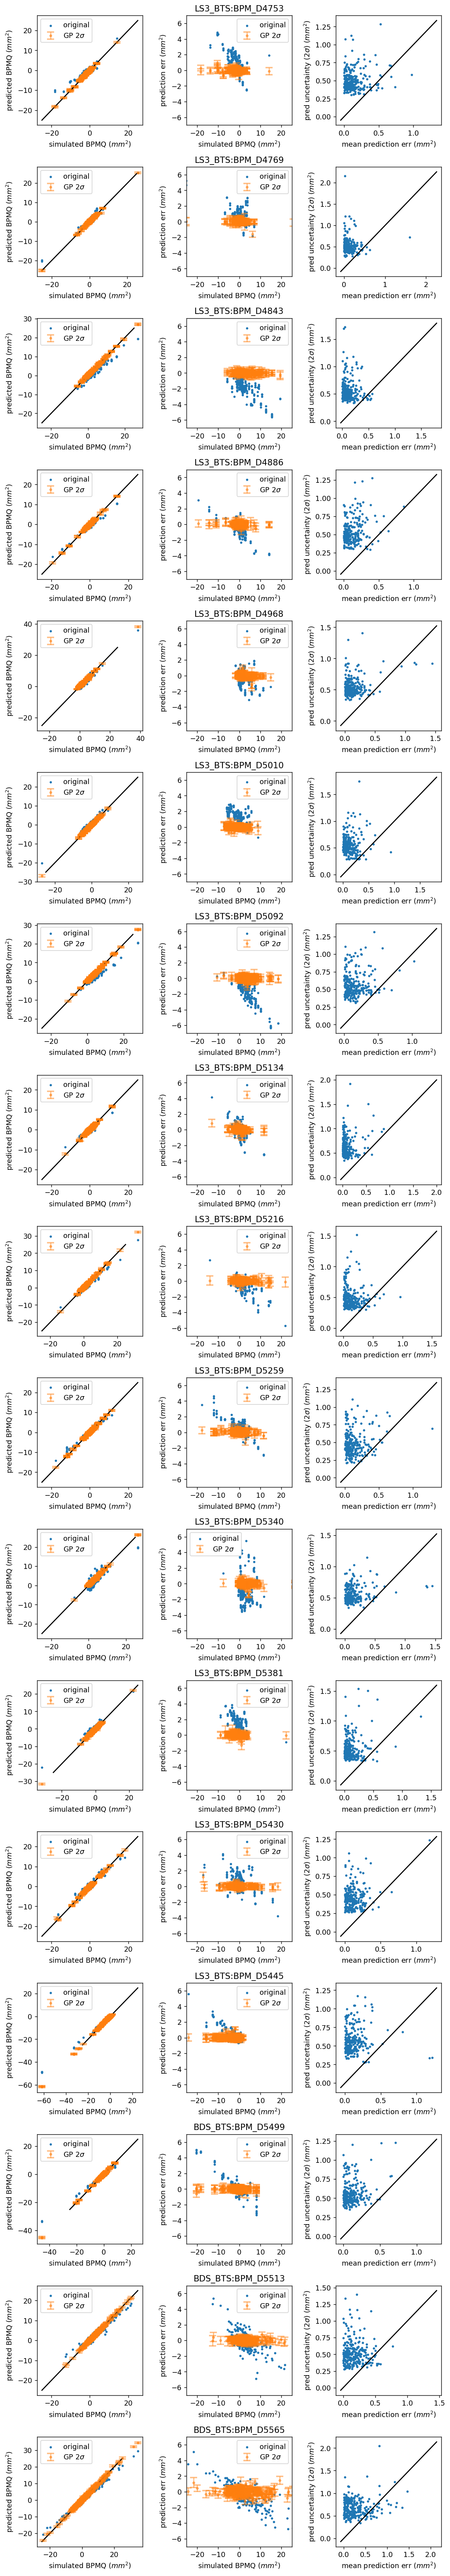

In [35]:
# Plotting
fig, ax = plt.subplots(len(BPMs), 3, figsize=(9, 3*len(BPMs)), dpi=128)  # Corrected figsize
for i, bpm in enumerate(BPMs):    
    # Flatten the mean and std arrays
    mean = train_Q_GPpred[bpm]['mean'].flatten()
    std = train_Q_GPpred[bpm]['std'].flatten()   # 2-sigma error bars
    
    # First subplot in the row
    ax[i, 0].scatter(train_Qsim[bpm], train_Qmeas[bpm], label='original',s=5)
    ax[i, 0].errorbar(train_Qsim[bpm], mean, std, fmt='.', linestyle='none', capsize=5, capthick=2, label='GP 2$\sigma$', color='C1', alpha=0.5)
    ax[i, 0].plot([-25, 25], [-25, 25], color='k')
    ax[i, 0].set_xlabel('simulated BPMQ $(mm^2)$')
    ax[i ,0].set_ylabel('predicted BPMQ $(mm^2)$')
    ax[i, 0].legend()

    # Second subplot in the row
    ax[i, 1].scatter(train_Qsim[bpm], train_Qmeas[bpm] - train_Qsim[bpm], label='original',s=5)
    ax[i, 1].errorbar(train_Qsim[bpm], mean - train_Qsim[bpm], std, fmt='.', linestyle='none', capsize=5, capthick=2, label='GP 2$\sigma$', color='C1', alpha=0.5)
    ax[i, 1].set_xlabel('simulated BPMQ $(mm^2)$')
    ax[i ,1].set_ylabel('prediction err $(mm^2)$')
    ax[i, 1].set_xlim(-25, 25)
    ax[i, 1].set_ylim(-7, 7)
    ax[i, 1].legend()

    # Third subplot in the row
    err = torch.abs(mean - train_Qsim[bpm])
    unc = 2 * std
    
    ax[i, 2].scatter(err, unc,s=5)
    xmin = min(min(ax[i, 2].get_xlim()), min(ax[i, 2].get_ylim()))
    xmax = max(max(ax[i, 2].get_xlim()), max(ax[i, 2].get_ylim()))
    ax[i, 2].set_xlabel('mean prediction err $(mm^2)$')
    ax[i, 2].set_ylabel('pred uncertainty ($2\sigma$) $(mm^2)$')
    ax[i, 2].plot([xmin, xmax], [xmin, xmax], 'k')
    
    # Set a single title for each row on the first subplot
    ax[i, 1].set_title(bpm)

plt.tight_layout()
plt.show()

##### GP prediction on val data

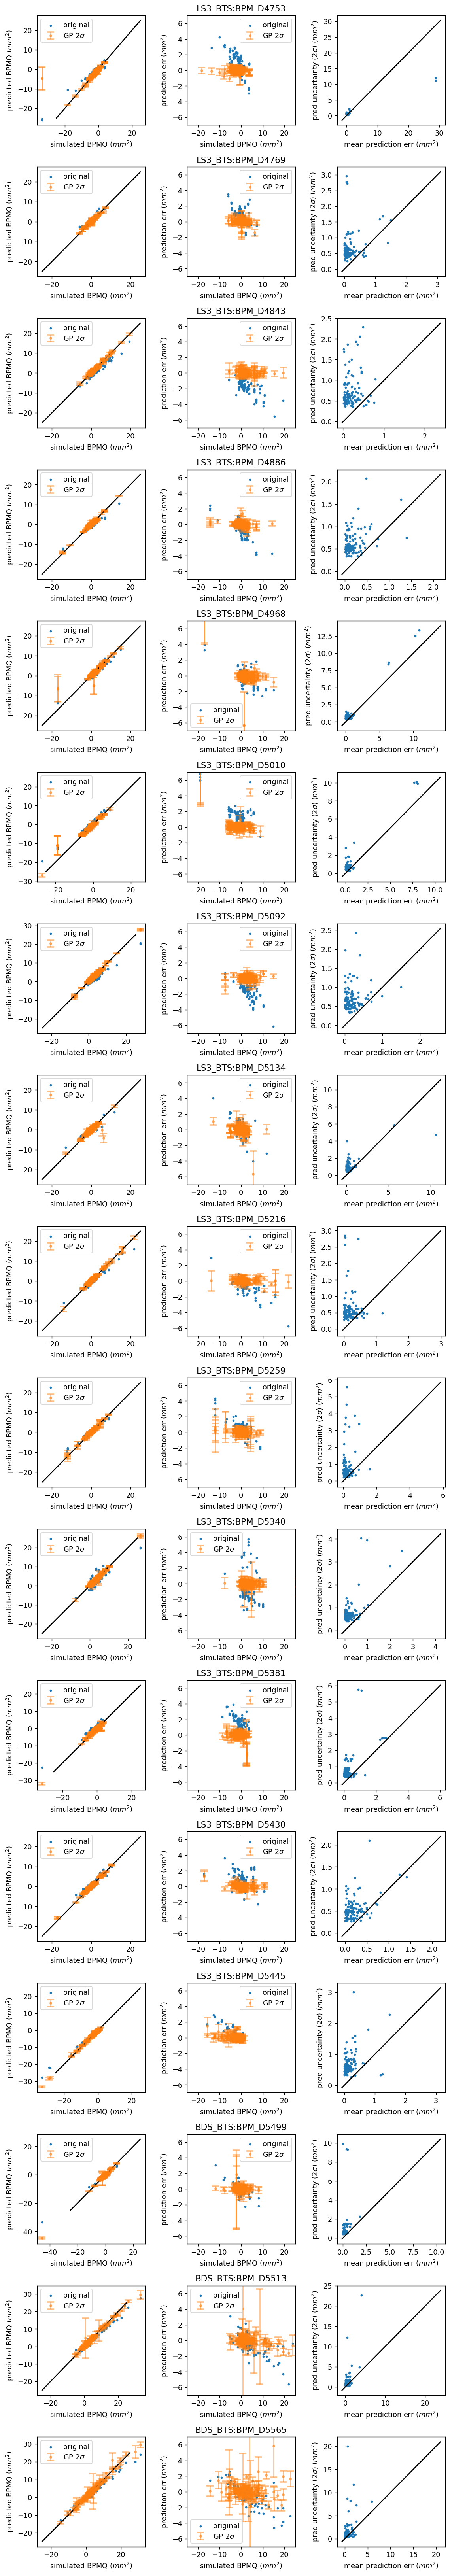

In [36]:
# Plotting
fig, ax = plt.subplots(len(BPMs), 3, figsize=(9, 3*len(BPMs)), dpi=128)  # Corrected figsize
for i, bpm in enumerate(BPMs):    
    # Flatten the mean and std arrays
    mean = val_Q_GPpred[bpm]['mean'].flatten()
    std = val_Q_GPpred[bpm]['std'].flatten()   # 2-sigma error bars
    
    # First subplot in the row
    ax[i, 0].scatter(val_Qsim[bpm], val_Qmeas[bpm], label='original',s=5)
    ax[i, 0].errorbar(val_Qsim[bpm], mean, std, fmt='.', linestyle='none', capsize=5, capthick=2, label='GP 2$\sigma$', color='C1', alpha=0.5)
    ax[i, 0].plot([-25, 25], [-25, 25], color='k')
    ax[i, 0].set_xlabel('simulated BPMQ $(mm^2)$')
    ax[i ,0].set_ylabel('predicted BPMQ $(mm^2)$')
    ax[i, 0].legend()

    # Second subplot in the row
    ax[i, 1].scatter(val_Qsim[bpm], val_Qmeas[bpm] - val_Qsim[bpm], label='original',s=5)
    ax[i, 1].errorbar(val_Qsim[bpm], mean - val_Qsim[bpm], std, fmt='.', linestyle='none', capsize=5, capthick=2, label='GP 2$\sigma$', color='C1', alpha=0.5)
    ax[i, 1].set_xlabel('simulated BPMQ $(mm^2)$')
    ax[i ,1].set_ylabel('prediction err $(mm^2)$')
    ax[i, 1].set_xlim(-25, 25)
    ax[i, 1].set_ylim(-7, 7)
    ax[i, 1].legend()

    # Third subplot in the row
    err = torch.abs(mean - val_Qsim[bpm])
    unc = 2 * std
    
    ax[i, 2].scatter(err, unc, s=5)
    xmin = min(min(ax[i, 2].get_xlim()), min(ax[i, 2].get_ylim()))
    xmax = max(max(ax[i, 2].get_xlim()), max(ax[i, 2].get_ylim()))
    ax[i, 2].set_xlabel('mean prediction err $(mm^2)$')
    ax[i, 2].set_ylabel('pred uncertainty ($2\sigma$) $(mm^2)$')
    ax[i, 2].plot([xmin, xmax], [xmin, xmax], 'k')
    
    # Set a single title for each row on the first subplot
    ax[i, 1].set_title(bpm)

plt.tight_layout()
plt.show()

### train GP with all data

In [37]:
GPs = {}
for bpm in BPMs:
    fname = bpm.replace('_D','')[-7:] 
    with torch.no_grad():
        model = models[bpm].eval()
        x, _ = model(torch.tensor(f1_T1[bpm]),
                      torch.tensor(f1_T2[bpm]),
                      torch.tensor(f1_T3[bpm]),
                      torch.tensor(f1_T4[bpm]),
                      torch.tensor(f1_xy[bpm]))
        y = torch.tensor(f1_Qsim[bpm])
        yerr = torch.sqrt(0.5*torch.tensor(f1_Qerr[bpm]**2) + 0.5*0.5**2)
        # yerr = torch.sqrt( 0.25*y**2 + 0.25*(f1_Qmeas[bpm] - f1_Qsim[bpm])**2 +  0.25*f1_Qerr[bpm]**2 + 0.25*0.5**2)
        
        x_max, x_min = x.max(dim=0).values.view(1,-1), x.min(dim=0).values.view(1,-1)
        y_mean, y_std = y.mean(), y.std()
        f1_x = (x - x_min)/(x_max-x_min)
        f1_y = (y - y_mean)/y_std
        f1_yvar = (yerr/y_std)**2
        f1_x = f1_x.to(torch.float64)
        f1_y = f1_y.to(torch.float64).view(-1,1)
        f1_yvar = f1_yvar.to(torch.float64).view(-1,1)
    gp = SingleTaskGP(f1_x, f1_y, train_Yvar = f1_yvar)
    mll = ExactMarginalLogLikelihood(gp.likelihood, gp)
    fit_gpytorch_mll(mll)
        
    torch.save({
        "state_dict": gp.state_dict(),
        "train_x": f1_x, 
        "train_y": f1_y,
        "train_yvar": f1_yvar,
        "x_max":x_max,
        "x_min":x_min,
        "y_mean":y_mean,
        "y_std":y_std,
        }, fname+'/gp_TISRAW2BPMQ.pt')